In [1]:
import sys

sys.path.append("./../../src")

from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader
from Transformer import SpeechCommandTransformer, train_transformer, plot_confusion_matrix, plot_accuracy_loss, set_seed
import torch
from torch.optim import AdamW
import torch.nn as nn
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
torch.cuda.empty_cache()
set_seed(213)

In [2]:
train_dataset = SpeechCommandsDataset("../../data/train", mode="original")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=6)

test_dataset = SpeechCommandsDataset("../../data/test", mode="original")
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=6)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device)

Epoch [1/20], Train Loss: 3.4537, Train Accuracy: 3.68, Test Accuracy: 3.66%


Epoch [2/20], Train Loss: 3.4319, Train Accuracy: 3.48, Test Accuracy: 3.56%


Epoch [3/20], Train Loss: 3.4294, Train Accuracy: 3.42, Test Accuracy: 3.68%


Epoch [4/20], Train Loss: 3.4289, Train Accuracy: 3.46, Test Accuracy: 3.54%


Epoch [5/20], Train Loss: 3.4284, Train Accuracy: 3.53, Test Accuracy: 3.80%


Epoch [6/20], Train Loss: 3.4279, Train Accuracy: 3.51, Test Accuracy: 3.80%


Epoch [7/20], Train Loss: 3.4273, Train Accuracy: 3.52, Test Accuracy: 3.87%


Epoch [8/20], Train Loss: 3.4274, Train Accuracy: 3.50, Test Accuracy: 3.47%


Epoch [9/20], Train Loss: 3.4275, Train Accuracy: 3.44, Test Accuracy: 3.53%


KeyboardInterrupt: 

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [5]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, optimizer=optimizer)

Epoch [1/20], Train Loss: 2.6307, Train Accuracy: 24.72, Test Accuracy: 49.82%


Epoch [2/20], Train Loss: 1.3492, Train Accuracy: 60.80, Test Accuracy: 68.81%


Epoch [3/20], Train Loss: 0.9514, Train Accuracy: 72.10, Test Accuracy: 75.85%


Epoch [4/20], Train Loss: 0.7703, Train Accuracy: 76.99, Test Accuracy: 79.40%


Epoch [5/20], Train Loss: 0.6581, Train Accuracy: 80.18, Test Accuracy: 79.62%


Epoch [6/20], Train Loss: 0.5823, Train Accuracy: 82.39, Test Accuracy: 81.81%


Epoch [7/20], Train Loss: 0.5198, Train Accuracy: 83.96, Test Accuracy: 82.42%


Epoch [8/20], Train Loss: 0.4742, Train Accuracy: 85.41, Test Accuracy: 83.56%


Epoch [9/20], Train Loss: 0.4389, Train Accuracy: 86.45, Test Accuracy: 83.81%


Epoch [10/20], Train Loss: 0.4001, Train Accuracy: 87.79, Test Accuracy: 84.52%


Epoch [11/20], Train Loss: 0.2937, Train Accuracy: 91.15, Test Accuracy: 87.48%


Epoch [12/20], Train Loss: 0.2761, Train Accuracy: 91.75, Test Accuracy: 87.18%


Epoch [13/20], Train Loss: 0.2672, Train Accuracy: 91.87, Test Accuracy: 87.30%


Epoch [14/20], Train Loss: 0.2604, Train Accuracy: 92.35, Test Accuracy: 87.67%


Epoch [15/20], Train Loss: 0.2567, Train Accuracy: 92.32, Test Accuracy: 87.51%


Epoch [16/20], Train Loss: 0.2499, Train Accuracy: 92.65, Test Accuracy: 87.68%


Epoch [17/20], Train Loss: 0.2471, Train Accuracy: 92.61, Test Accuracy: 87.48%


Epoch [18/20], Train Loss: 0.2411, Train Accuracy: 92.77, Test Accuracy: 87.81%


Epoch [19/20], Train Loss: 0.2373, Train Accuracy: 92.90, Test Accuracy: 87.98%


Epoch [20/20], Train Loss: 0.2321, Train Accuracy: 93.04, Test Accuracy: 87.60%
Best Test Accuracy: 87.60%, Best Train Accuracy: 93.04%


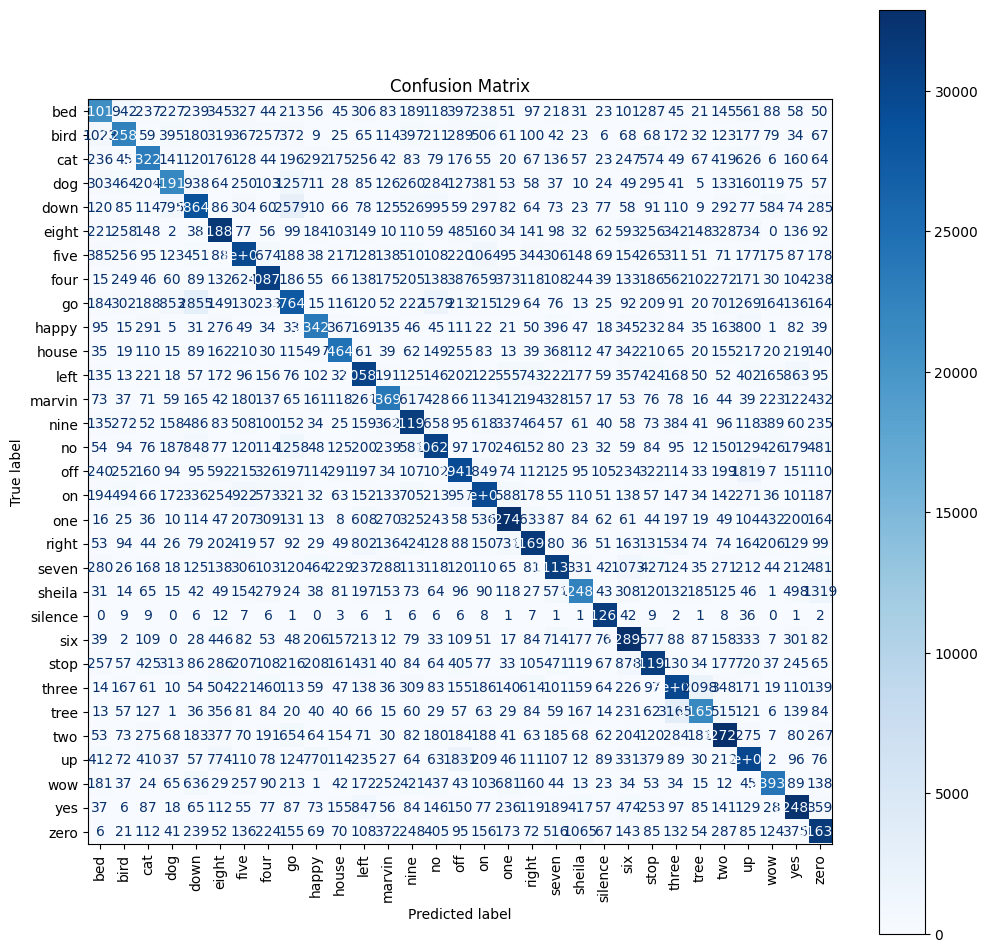

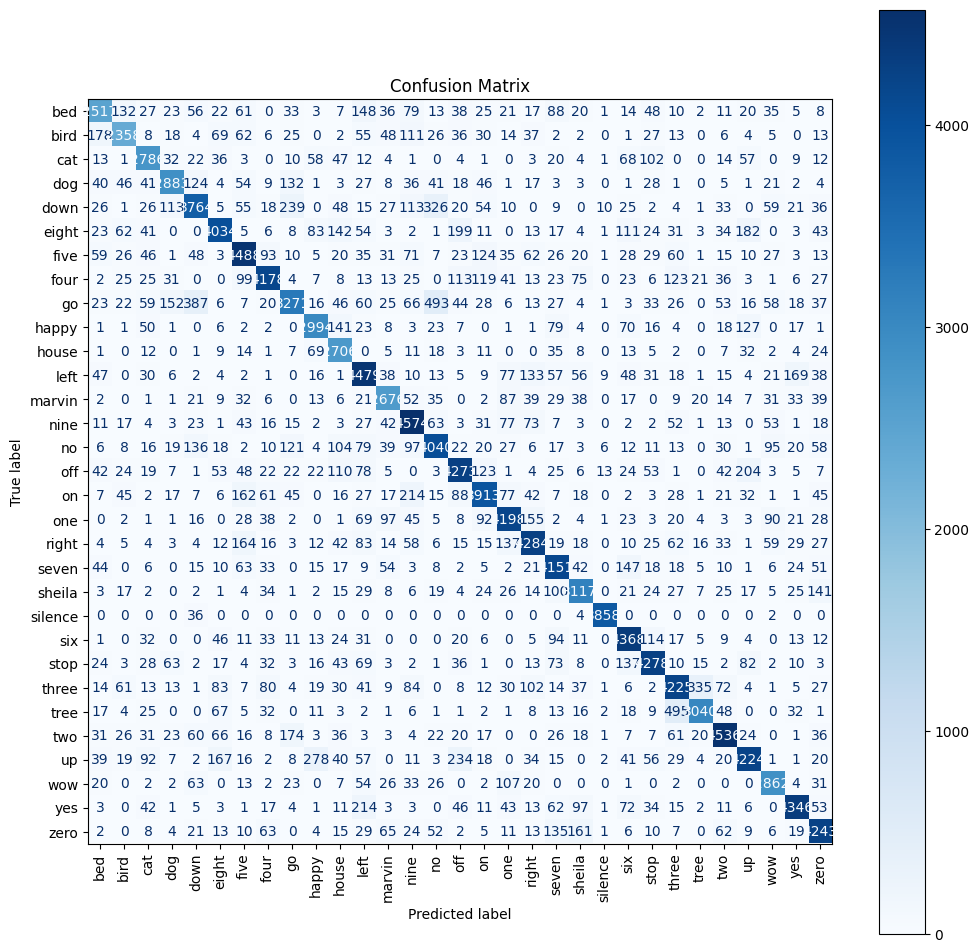

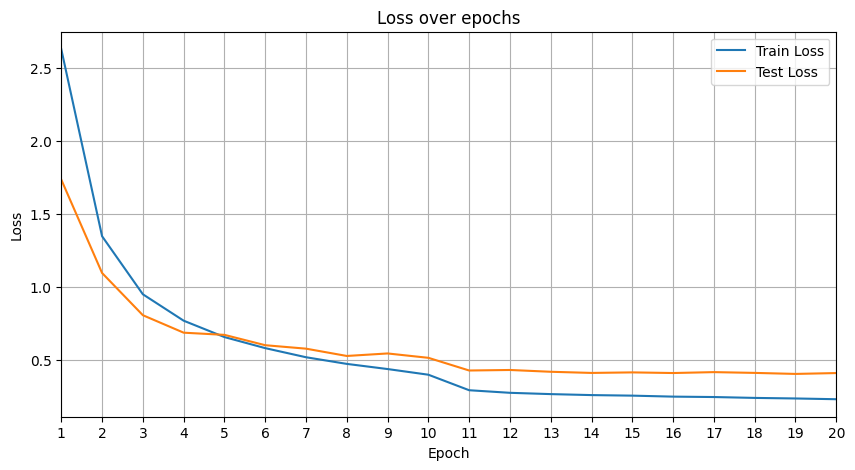

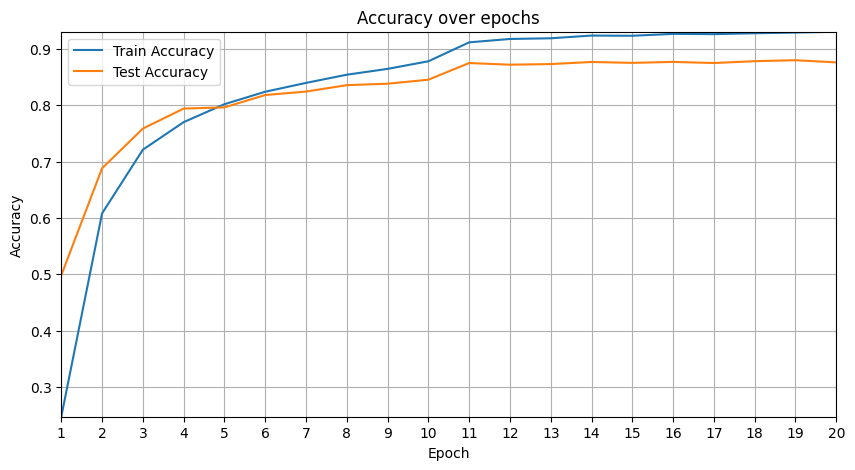

In [9]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=False)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=False)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

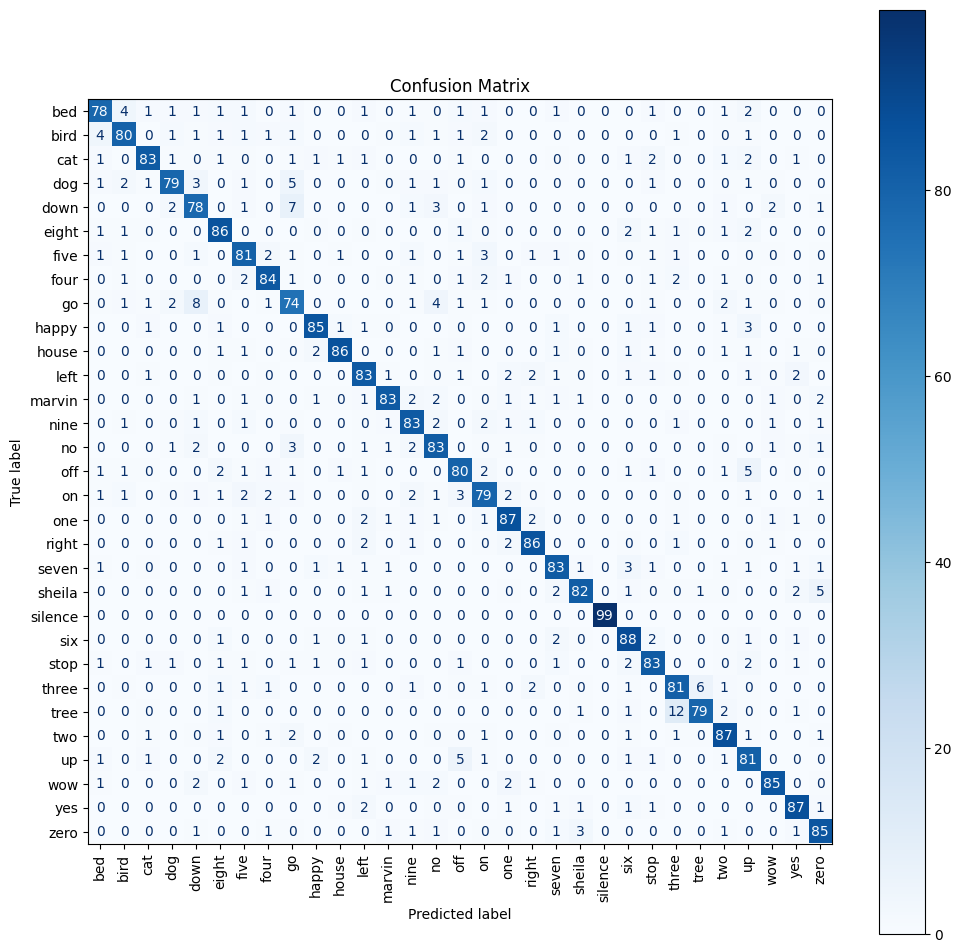

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(train_true_labels, train_pred_labels)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0
label_names = list(train_dataset.class_to_idx.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(include_values=True, xticks_rotation="vertical", ax=ax, cmap="Blues",
          values_format=".0f")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

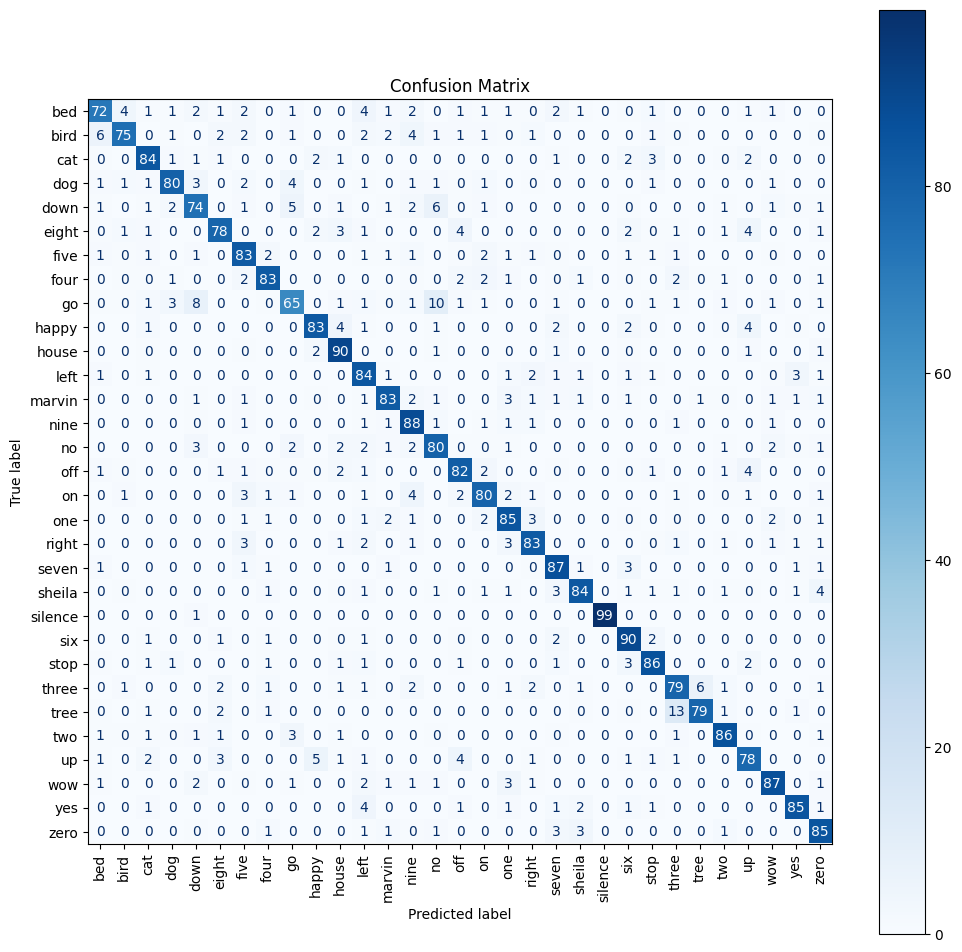

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_true_labels, test_pred_labels)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0
label_names = list(test_dataset.class_to_idx.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(include_values=True, xticks_rotation="vertical", ax=ax, cmap="Blues",
          values_format=".0f")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, optimizer=optimizer, scheduling=False)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2, pos_embedding=True).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, optimizer=optimizer)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, optimizer=optimizer, scheduler=scheduler)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.0001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, optimizer=optimizer)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2, num_layers=8).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2, num_heads=8).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)